<a href="https://colab.research.google.com/github/dfariba/Aggregated-Wind-Farm-Power-Prediction-using-Statistical-Methods/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Aggregated Wind Farm Power Production Located in Belgium
Source of data: www.elia.be

ARIMA Model

In [ ]:
import pandas as pd
import matplotlib
import pandas.plotting
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load dataset
df_power = pd.read_csv ('AggregatedWindFarm_Belgium.csv', header=0, parse_dates = [0])

<AxesSubplot: >

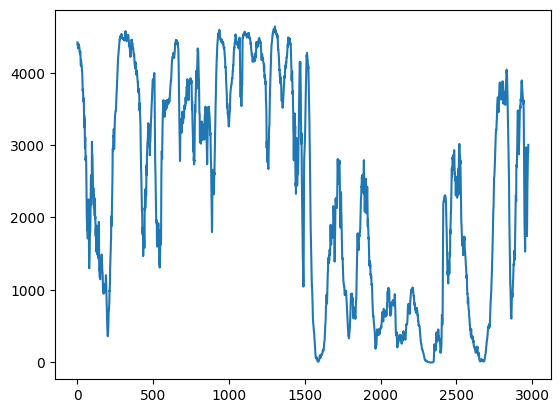

In [ ]:
df_power['Measured & upscaled [MW]'].plot()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

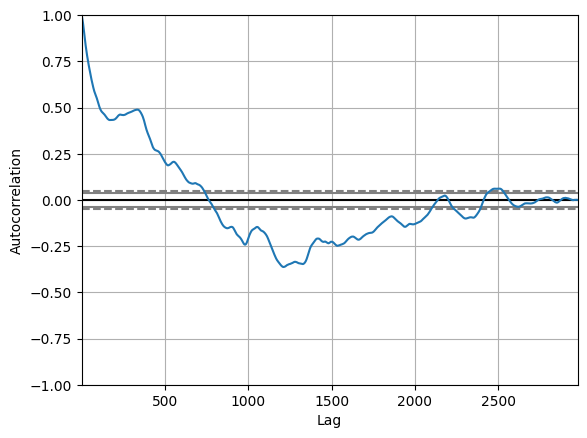

In [ ]:
 pandas.plotting.autocorrelation_plot(df_power['Measured & upscaled [MW]'])

C:\Users\98990\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


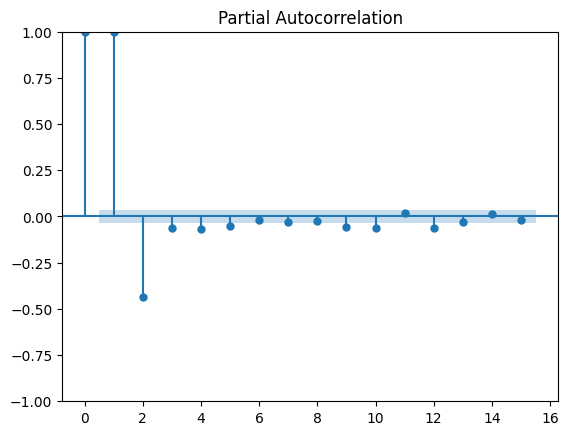

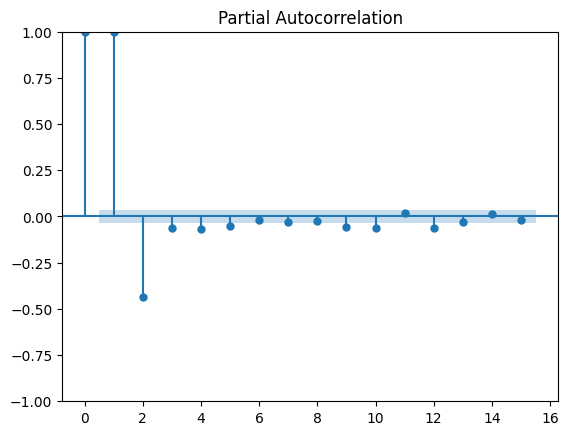

In [ ]:
plot_pacf(df_power['Measured & upscaled [MW]'], lags=15)

In [ ]:
model = ARIMA(df_power['Measured & upscaled [MW]'], order=(6,10,2))

In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Measured & upscaled [MW]   No. Observations:                 2976
Model:                       ARIMA(2, 5, 2)   Log Likelihood              -18418.922
Date:                      Sun, 07 Apr 2024   AIC                          36847.845
Time:                              23:00:02   BIC                          36877.828
Sample:                                   0   HQIC                         36858.635
                                     - 2976                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6917      0.013    -51.948      0.000      -0.718      -0.666
ar.L2         -0.3246      0.014    -23.186      0.000      -0.352      -0.297
ma.L1         -2.0000      0.018   -109.361      0.000      -2.036      -1.964
ma.L2          1.0000      0.018     54.629      0.000       0.964       1.036
sigma2      2.046e+04    1.8e-06   1.14e+10      0.000    2.05e+04    2.05e+04
===================================================================================
Ljung-Box (L1) (Q):                 186.44   Jarque-Bera (JB):             11671.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+24. Standard errors may be unstable.
"""

<AxesSubplot: >

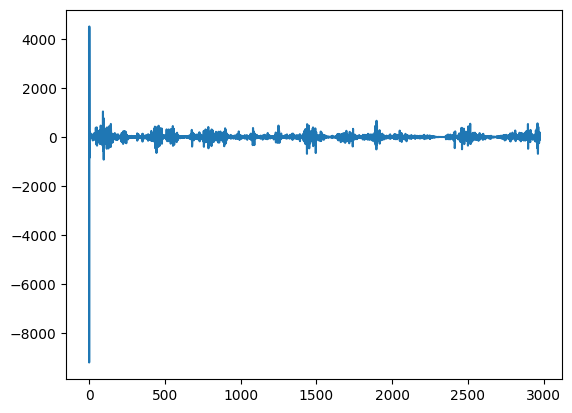

In [ ]:
residuals = model_fit.resid
residuals.plot()

In [ ]:
residuals.describe()

count    2976.000000
mean       -0.026266
std       234.603672
min     -9196.078685
25%       -39.013442
50%        -0.047213
75%        38.378096
max      4507.382787
dtype: float64

In [ ]:
output = model_fit.forecast()
output

2976    3081.123999
dtype: float64

In [ ]:
model_fit.forecast(10)

2976    3081.123999
2977    3175.844582
2978    3304.154736
2979    3438.947072
2980    3593.537601
2981    3767.515660
2982    3956.846171
2983    4164.456379
2984    4389.633966
2985    4631.924671
Name: predicted_mean, dtype: float64